# Dimensionality Reduction: PCA - principal component analysis 

* Principal component analysis (PCA) is a mathematical algorithm that reduces the dimensionality of the data while retaining most of the variation in the data set1. It accomplishes this reduction by identifying directions, called principal components, along which the variation in the data is maximal.

The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. The same is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation that was present in the original components. The principal components are the eigenvectors of a covariance matrix, and hence they are orthogonal.
* Importantly, the dataset on which PCA technique is to be used must be scaled. The results are also sensitive to the relative scaling. As a layman, it is a method of summarizing data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.data.shape

(569, 30)

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# visualizing PCA

(569, 30)
(569, 2)


Text(0, 0.5, 'Second principal component')

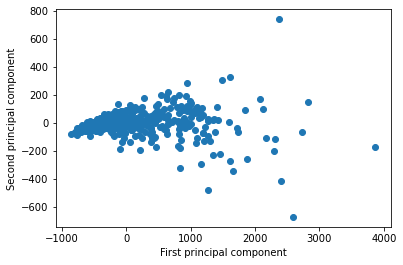

In [9]:
from sklearn.decomposition import PCA
print(cancer.data.shape)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(cancer.data)
print(X_pca.shape)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

Text(0, 0.5, 'second principal component')

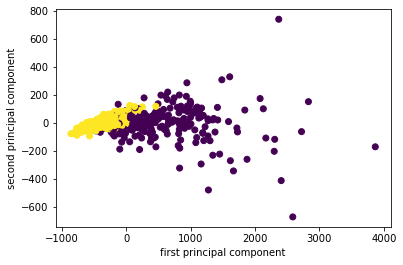

In [10]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

# with standard scaler



Text(0, 0.5, 'second principal component')

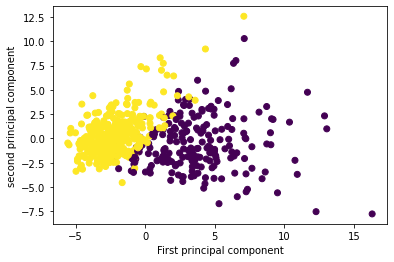

In [12]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(cancer.data)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:,1], c=cancer.target)
plt.xlabel('First principal component')
plt.ylabel('second principal component')

# Pca and the logisticReg

In [13]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [17]:
lr =  LogisticRegression(C=10000).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.960093896713615
0.9300699300699301


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.960093896713615
0.9230769230769231


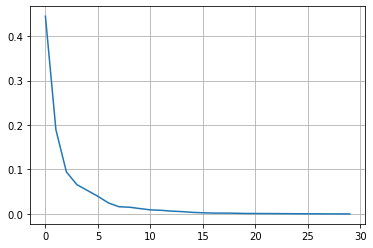

In [21]:
# checking out the best pca

pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X_train, y_train)
pca=pca_scaled.named_steps['pca']

plt.plot(pca.explained_variance_ratio_)
plt.grid()

In [24]:
# check out 6 and 7
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=6), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9812206572769953
0.958041958041958


In [25]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=7), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9835680751173709
0.958041958041958
